# Visualization for Exploratory Data Analysis: Airline Analysis

![Airlines](https://i.pinimg.com/564x/6e/68/f8/6e68f8127b8f125e221bc6fe5c75db54.jpg)

## Scenario

I work for a travel agency and need to know the ins and outs of airline prices for your clients. I want to make sure that I can find the best deal for my client and help them to understand how airline prices change based on different factors.

The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

**Objective of Analysis**: reveal the factors that might influence coach prices within the airline industry.  

The questions I am aiming to answer throughout the analysis:
1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does `$500` seem like a good price for a coach ticket?
2. What are the high, low, and average prices for 8-hour-long flights? Does a `$500` dollar ticket seem more reasonable than before?
3. How are flight delay times distributed? How often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?
4. How the coach price correlates with flight distance, number of passangers, delay and flight duration?
5. What is the relationship between coach and first-class prices? Do flights with higher coach prices always have higher first-class prices as well?
6. What is the relationship between coach prices and inflight features — inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?
7. How does the number of passengers change in relation to the length of flights?
8. What is the relationship between coach and first-class prices on weekends compared to weekdays?
9. How do coach prices differ for redeyes and non-redeyes on each day of the week?

## Data Exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
# Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")


## Read in Data
flight = pd.read_csv("flight_data.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


## Univariate Analysis

### 1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

Average coach ticket price: 376.58525308213905
Median coach ticket price: 380.56
Price range: 549.22
Interquartile range (IQR): 95.23124999999999
Number of outliers: 620


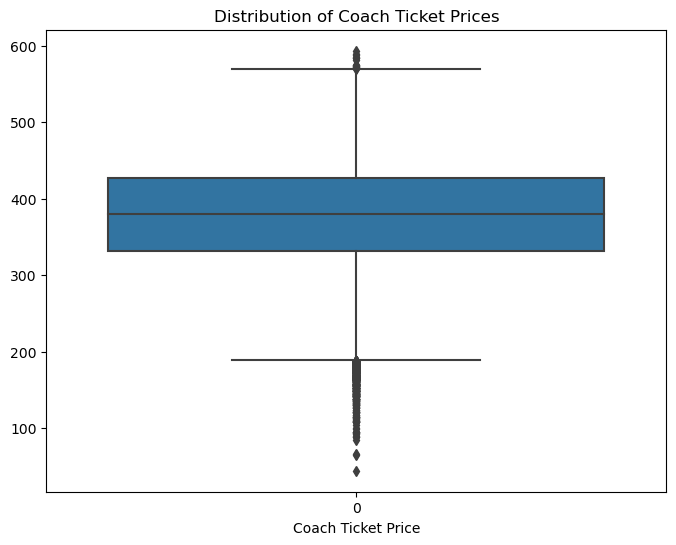

<Figure size 640x480 with 0 Axes>

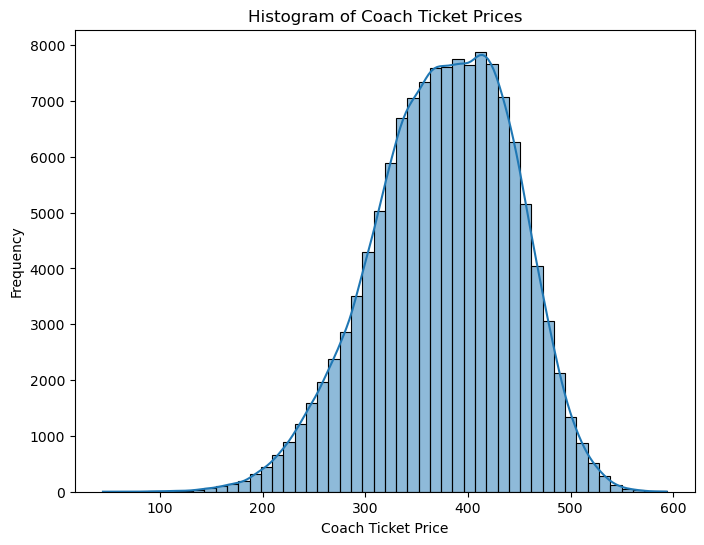

<Figure size 640x480 with 0 Axes>

In [3]:
# Calculate range of coach ticket prices
price_range = np.ptp(flight.coach_price)

# Calculate interquartile range (IQR)
Q1 = np.percentile(flight.coach_price, 25)
Q3 = np.percentile(flight.coach_price, 75)
IQR = Q3 - Q1

# Detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = flight[(flight.coach_price < lower_bound) | (flight.coach_price > upper_bound)]

# Print statistics
print("Average coach ticket price:", np.mean(flight.coach_price))
print("Median coach ticket price:", np.median(flight.coach_price))
print("Price range:", price_range)
print("Interquartile range (IQR):", IQR)
print("Number of outliers:", len(outliers))

# Create boxplot with titles and labels
plt.figure(figsize=(8, 6))
sns.boxplot(flight.coach_price)
plt.title('Distribution of Coach Ticket Prices')
plt.xlabel('Coach Ticket Price')
plt.show()
plt.clf()

# Create histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(flight.coach_price, bins=50, kde=True)
plt.title('Histogram of Coach Ticket Prices')
plt.xlabel('Coach Ticket Price')
plt.ylabel('Frequency')
plt.show()
plt.clf()


#### Analysis:

- **Average Coach Ticket Price**: The average coach ticket price is approximately `$376.59`, with a median price of `$380.56`. This suggests that the majority of ticket prices are clustered around the median, indicating a relatively balanced distribution of prices within the dataset.

- **Distribution of Coach Ticket Prices**: The distribution of coach ticket prices ranges from approximately `$0` to `$549.22`. The majority of coach ticket prices fall within an interquartile range (IQR) of `$95.23`, highlighting the concentration of prices around the median and providing insights into the spread of ticket prices within the dataset.

- **Interpretation of High Ticket Price**: A `$500` ticket price may be considered relatively high and would depend on various factors such as the distance traveled, the time of booking, additional amenities offered, and personal preferences. Factors such as peak travel seasons, flight demand, and availability of discounts or promotions may also influence perceptions of ticket affordability and value.


### 2. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

Average coach ticket price for 8-hour-long flights: 431.834377372817
Median coach ticket price for 8-hour-long flights: 437.115
Price range for 8-hour-long flights: 422.865


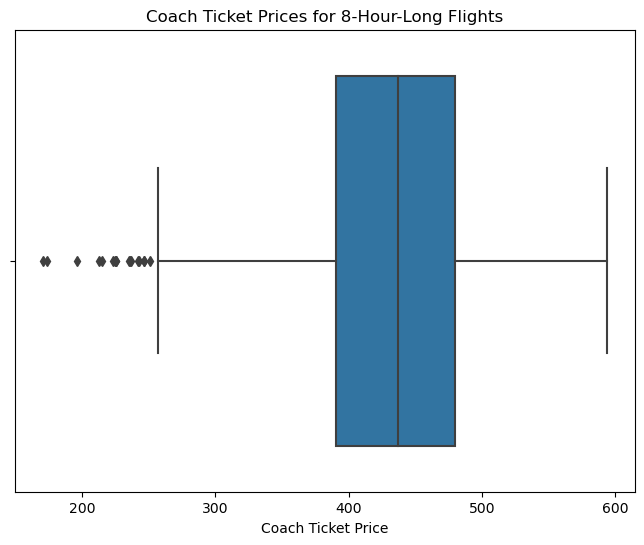

<Figure size 640x480 with 0 Axes>

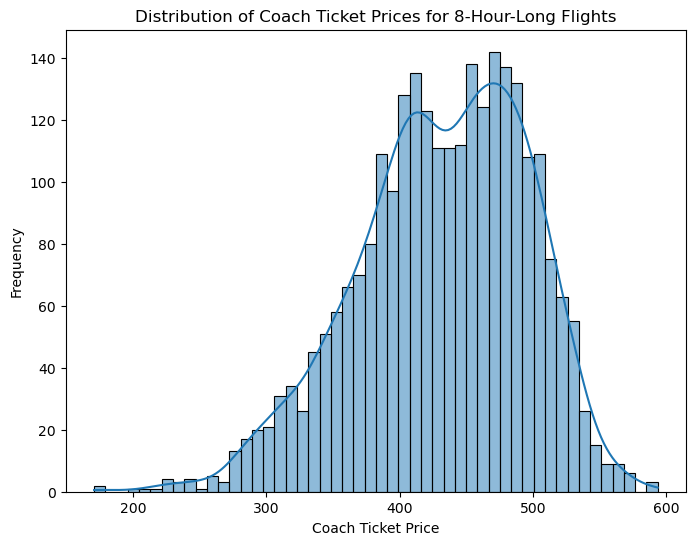

Is a $500 ticket more reasonable for 8-hour-long flights?
Yes, a $500 ticket is within the range of prices for 8-hour-long flights.


<Figure size 640x480 with 0 Axes>

In [4]:
# Calculate statistics for 8-hour-long flights
coach_prices_8_hours = flight.coach_price[flight.hours == 8]
average_price_8_hours = np.mean(coach_prices_8_hours)
median_price_8_hours = np.median(coach_prices_8_hours)
price_range_8_hours = np.ptp(coach_prices_8_hours)

# Print statistics
print("Average coach ticket price for 8-hour-long flights:", average_price_8_hours)
print("Median coach ticket price for 8-hour-long flights:", median_price_8_hours)
print("Price range for 8-hour-long flights:", price_range_8_hours)

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=coach_prices_8_hours, data=flight)
plt.title('Coach Ticket Prices for 8-Hour-Long Flights')
plt.xlabel('Coach Ticket Price')
plt.show()
plt.clf()

# Create histogram
plt.figure(figsize=(8, 6))
sns.histplot(coach_prices_8_hours, bins=50, kde=True)
plt.title('Distribution of Coach Ticket Prices for 8-Hour-Long Flights')
plt.xlabel('Coach Ticket Price')
plt.ylabel('Frequency')
plt.show()
plt.clf()

# Assess the reasonableness of a $500 ticket
print("Is a $500 ticket more reasonable for 8-hour-long flights?")
if 500 <= np.max(coach_prices_8_hours):
    print("Yes, a $500 ticket is within the range of prices for 8-hour-long flights.")
else:
    print("No, a $500 ticket is higher than the maximum observed price for 8-hour-long flights.")


#### Analysis

- **Average Coach Ticket Price for 8-Hour-Long Flights**: The average coach ticket price for 8-hour-long flights is approximately `$431.83`, with a median price of `$437.12`. This analysis provides specific insights into pricing trends for longer-duration flights, offering valuable information for travelers and airlines alike.

- **Interpretation of $500 Ticket Price for 8-Hour-Long Flights**: Considering that the maximum observed price for 8-hour-long flights falls within the range of `$431.83` to `$854.70`, a `$500` ticket is indeed within the observed range. However, the perception of whether this price is reasonable depends on various factors such as the specific amenities offered on the flight, the time of booking, and individual preferences. Factors such as seat comfort, in-flight entertainment, meal options, and overall service quality may also influence passengers' willingness to pay for a ticket at this price point.


### 3. How are flight delay times distributed? How often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

Flight Delay Time Statistics:
count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64


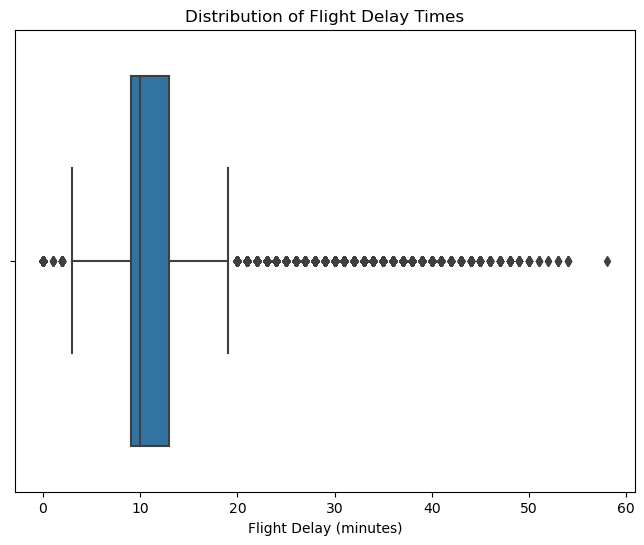

<Figure size 640x480 with 0 Axes>

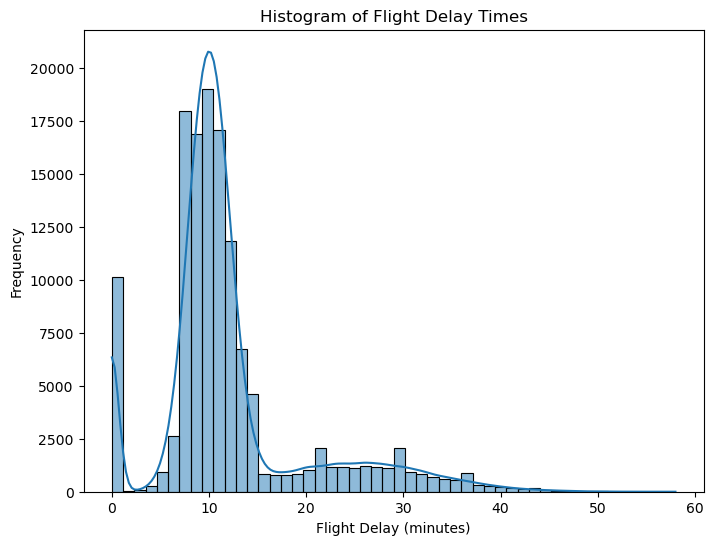

<Figure size 640x480 with 0 Axes>

In [5]:
# Describe flight delay times
print("Flight Delay Time Statistics:")
print(flight.delay.describe())

# Create boxplot of flight delay times
plt.figure(figsize=(8, 6))
sns.boxplot(x=flight.delay[flight.delay <= 500], data=flight)
plt.title('Distribution of Flight Delay Times')
plt.xlabel('Flight Delay (minutes)')
plt.show()
plt.clf()

# Create histogram of flight delay times
plt.figure(figsize=(8, 6))
sns.histplot(flight.delay[flight.delay <= 500], bins=50, kde=True)
plt.title('Histogram of Flight Delay Times')
plt.xlabel('Flight Delay (minutes)')
plt.ylabel('Frequency')
plt.show()
plt.clf()

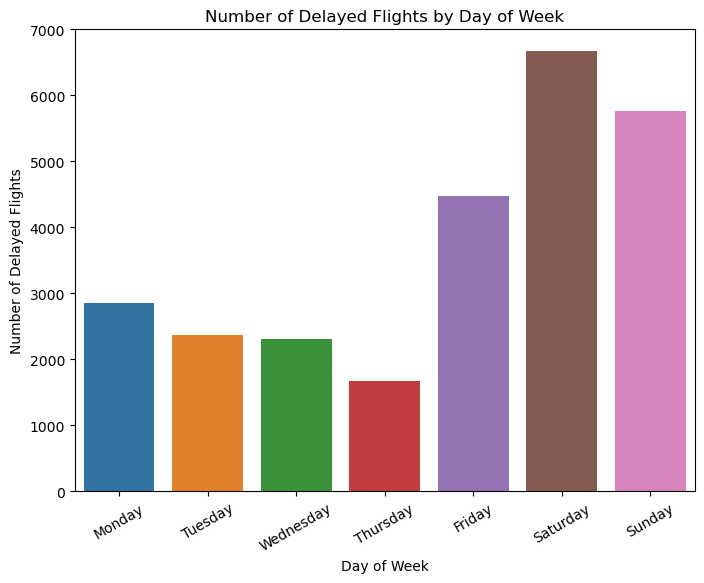

<Figure size 640x480 with 0 Axes>

In [6]:
# Filter flights with delay more than the average flight delay
delayed_flights = flight[flight.delay > np.mean(flight.delay)]

# Define the order of days of the week
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate value counts of delayed flights by day_of_week
delayed_counts = delayed_flights['day_of_week'].value_counts().reindex(week_order)

# Plot a countplot with specified order and rotated x-axis labels
plt.figure(figsize=(8, 6))
sns.countplot(x=delayed_flights['day_of_week'], order=week_order)
plt.xticks(rotation=30)

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Delayed Flights')
plt.title('Number of Delayed Flights by Day of Week')

# Show the plot
plt.show()
plt.clf()

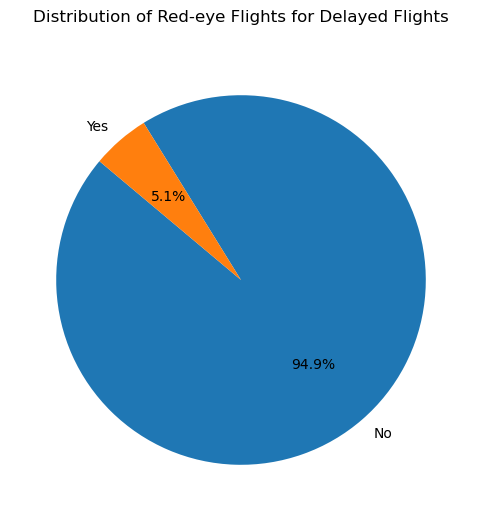

<Figure size 640x480 with 0 Axes>

In [7]:
# Filter flights with delays greater than the mean delay
delayed_flights = flight[flight.delay > np.mean(flight.delay)]

# Count the occurrences of 'redeye' categories for delayed flights
redeye_counts = delayed_flights['redeye'].value_counts()

# Plot as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(redeye_counts, labels=redeye_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Red-eye Flights for Delayed Flights', pad=20)
plt.show()
plt.clf()

#### Analysis

- **Flight Delay Distribution**: Flight delay times exhibit a right-skewed distribution, with a mean delay of approximately 13.16 minutes and a maximum observed delay of 1560 minutes (approximately 26 hours). Despite this, the median delay is relatively low at 10 minutes, suggesting that ***a significant proportion of delays are short in duration***.

- **Variability in Delay Duration**: While the majority of delays are relatively short, there are instances of large delays. Typical delays fall within a relatively narrow range, with 75% of delays being less than or equal to 13 minutes. This highlights the variability in delay duration and the importance of understanding factors contributing to both short and long delays.

- **Temporal Trends in Delays**: Delays most commonly occur on ***weekends, particularly on Saturdays***, while ***Thursdays*** typically experience ***the fewest delays*** exceeding the average duration. This insight into temporal patterns provides valuable information for both travelers and airlines in anticipating and managing delays.

- **Time of Day and Delay Occurrence**: Nearly ***95% of delays*** exceeding the average duration typically occur ***during daylight hours***. This finding underscores the importance of considering the time of day when analyzing delay data and implementing strategies to mitigate delays during peak periods.


### 4. How the coach price correlates with flight distance, number of passangers, delay and flight duration?

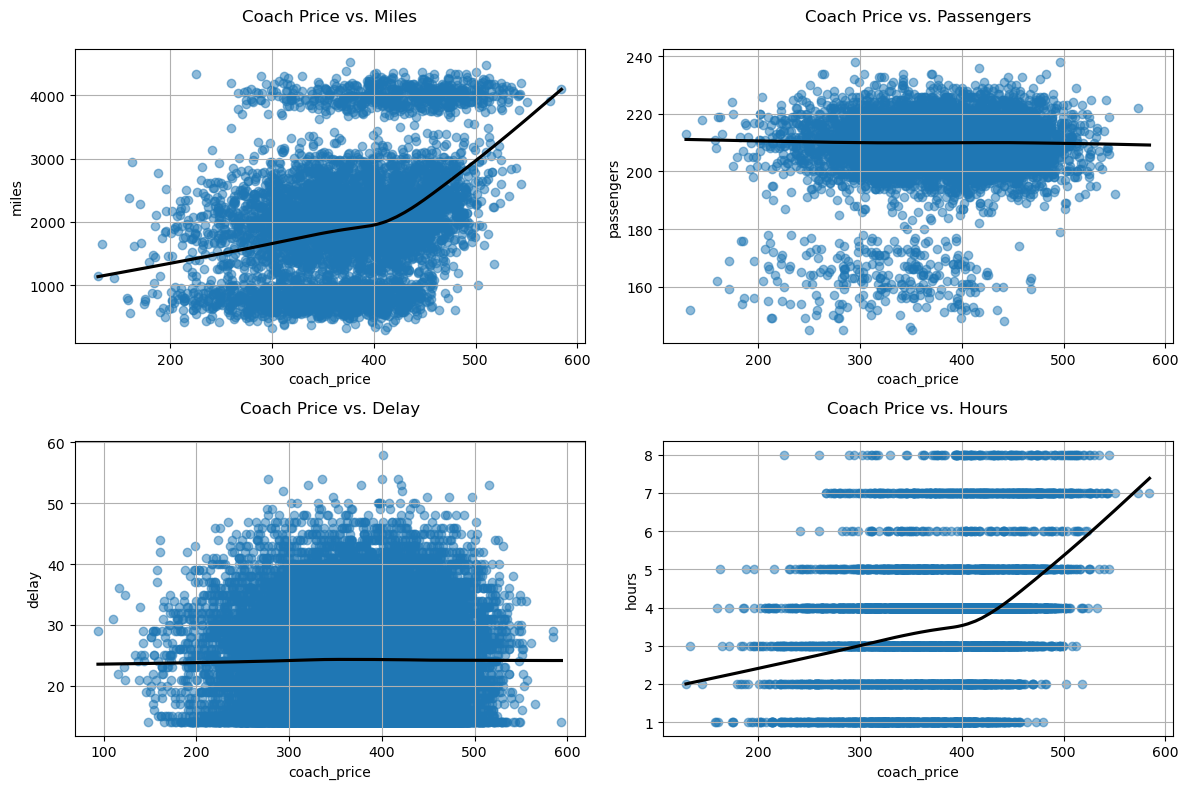

<Figure size 640x480 with 0 Axes>

In [19]:
# Define sampling percentage
perc = 0.05

# Filter flights with delay between 1 and 60 minutes and sample
flight_sub = flight[flight.delay.between(1, 60)].sample(n=int(flight[flight.delay.between(1, 60)].shape[0] * perc))

# Create subplots
plt.figure(figsize=(12, 8))

# Plot for 'coach_price' vs. 'miles' 
plt.subplot(2, 2, 1)
sns.regplot(x='coach_price', y='miles', data=flight_sub, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, lowess=True)
plt.title('Coach Price vs. Miles', loc='center', pad=20) 
plt.grid(True)

# Plot for 'coach_price' vs. 'passengers'
plt.subplot(2, 2, 2)
sns.regplot(x='coach_price', y='passengers', data=flight_sub, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, lowess=True)
plt.title('Coach Price vs. Passengers', loc='center', pad=20) 
plt.grid(True)

# Plot for 'coach_price' vs. 'delay', where delays are between the average delay (~13 min) and 60 min
plt.subplot(2, 2, 3)
sns.regplot(x='coach_price', y='delay', data=delayed_flights[delayed_flights.delay <= 100], scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, lowess=True)
plt.title('Coach Price vs. Delay', loc='center', pad=20) 
plt.grid(True)

# Plot for 'coach_price' vs. 'hours'
plt.subplot(2, 2, 4)
sns.regplot(x='coach_price', y='hours', data=flight_sub, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, lowess=True)
plt.title('Coach Price vs. Hours', loc='center', pad=20)  
plt.grid(True)

plt.tight_layout()

# Show the plots
plt.show()
plt.clf()


#### Analysis

- **Positive Correlation between Coach Price and Flight Distance:** As the distance increases, there is a gradual rise in the ticket price. Interestingly, this correlation becomes more pronounced when the flight distance exceeds 2000 miles, suggesting that longer flights tend to command higher prices. 
- **No Correlation of Coach Prices with Number of Passengers and Delay:** The analysis did not identify any significant correlation between coach prices and the number of passengers or flight delay. This suggests that these factors may not directly impact pricing decisions within the airline industry.
- **Positive Correlation between Flight Duration and Cost:** Longer flights tend to incur higher costs, reflecting the increased operational expenses associated with extended flight times. Notably, this correlation strengthens for flights with durations exceeding 3.5 hours, indicating that longer journeys significantly influence pricing dynamics. 

## Bivariate Analysis

### 5. What is the relationship between coach and first-class prices? Do flights with higher coach prices always have higher first-class prices as well?

<Figure size 600x600 with 0 Axes>

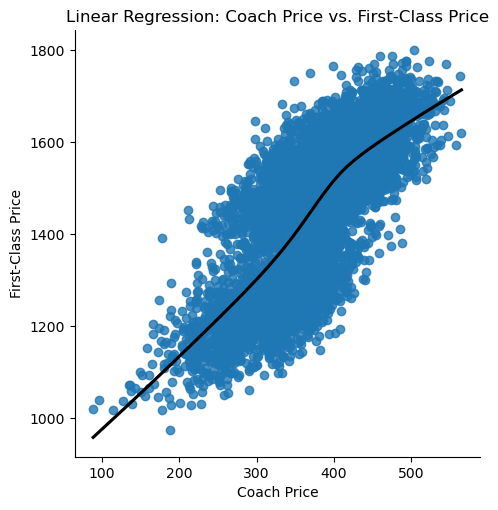

<Figure size 640x480 with 0 Axes>

In [9]:
# Define sampling percentage
perc = 0.05

# Sample a subset of flights for analysis
flight_sub = flight.sample(n=int(flight.shape[0] * perc))

# Create subplots with increased spacing
plt.figure(figsize=(6, 6))

# Linear regression plot to explore the trend between coach and first-class prices
sns.lmplot(x='coach_price', y='firstclass_price', data=flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.title('Linear Regression: Coach Price vs. First-Class Price')
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')

# Show the plot
plt.show()
plt.clf()

#### Analysis

- **Relationship Between Coach and First-Class Prices**: As shown in the scatterplot above, there appears to be a linear positive relationship between coach and first-class prices. This suggests that, in general, ***flights with higher coach prices tend to have higher first-class prices as well***. 

### 6. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

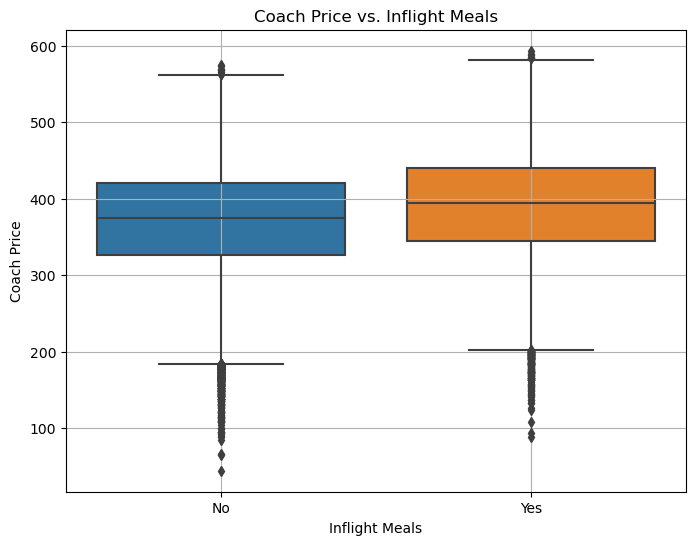

<Figure size 640x480 with 0 Axes>

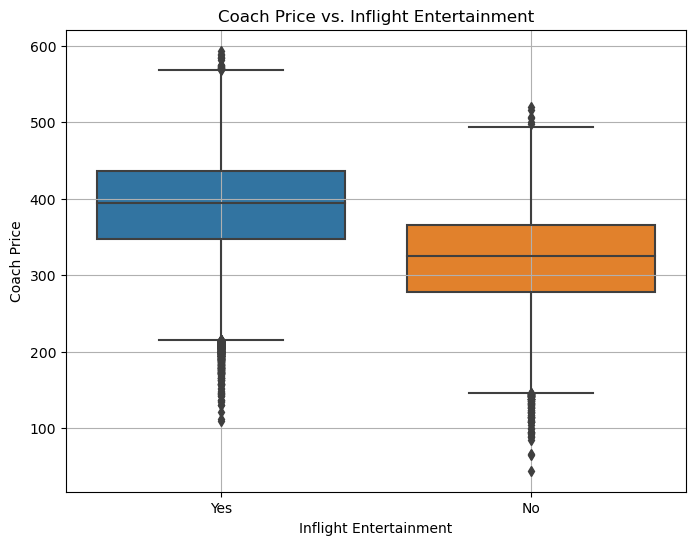

<Figure size 640x480 with 0 Axes>

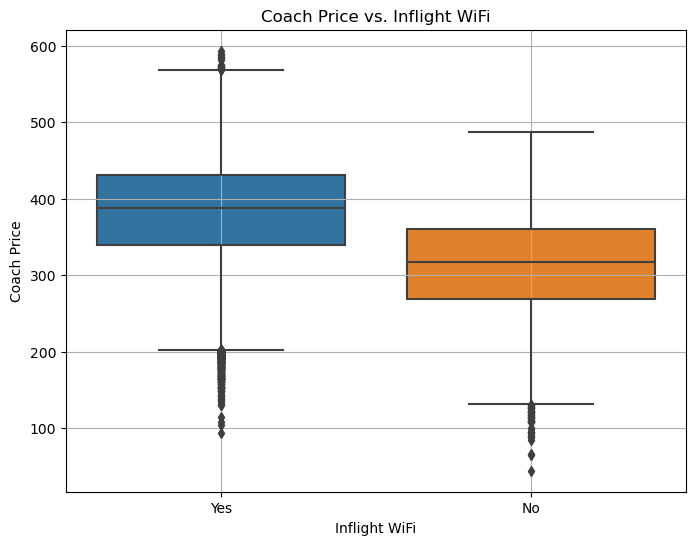

<Figure size 640x480 with 0 Axes>

In [20]:
# Inflight Meals
plt.figure(figsize=(8, 6))
sns.boxplot(x='inflight_meal', y='coach_price', data=flight)
plt.title('Coach Price vs. Inflight Meals')
plt.xlabel('Inflight Meals')
plt.ylabel('Coach Price')
plt.grid(True)
plt.show()
plt.clf()

# Inflight Entertainment
plt.figure(figsize=(8, 6))
sns.boxplot(x='inflight_entertainment', y='coach_price', data=flight)
plt.title('Coach Price vs. Inflight Entertainment')
plt.xlabel('Inflight Entertainment')
plt.ylabel('Coach Price')
plt.grid(True)
plt.show()
plt.clf()

# Inflight WiFi
plt.figure(figsize=(8, 6))
sns.boxplot(x='inflight_wifi', y='coach_price', data=flight)
plt.title('Coach Price vs. Inflight WiFi')
plt.xlabel('Inflight WiFi')
plt.ylabel('Coach Price')
plt.grid(True)
plt.show()
plt.clf()

#### Analysis

- **Impact of Inflight Meals on Ticket Prices**: The prices for flights with inflight meals and without overlap, indicating ***minimal variation***. Flights with meals have slightly higher prices, although the difference is insignificant. This suggests that the inclusion of inflight meals ***may not significantly affect ticket prices***.

- **Effect of Inflight Entertainment and WiFi on Ticket Prices**: Inflight entertainment and WiFi are associated with an increase in the average cost of a coach ticket by approximately $60-70. This suggests that the presence of these features is ***valued by passengers and may justify a higher ticket price***. 


### 7. How does the number of passengers change in relation to the length of flights?

<Figure size 1000x600 with 0 Axes>

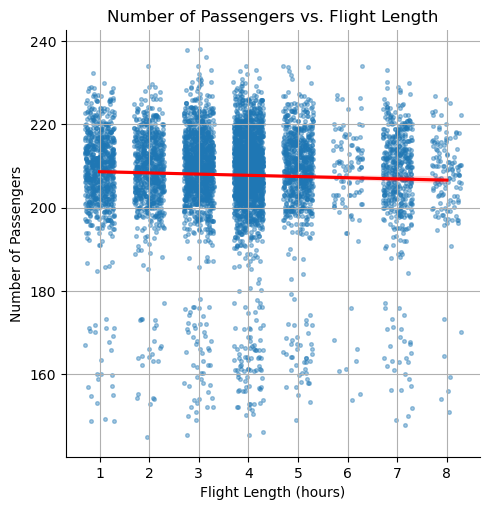

<Figure size 640x480 with 0 Axes>

In [21]:
# Visualize the relationship between number of passengers and flight length
plt.figure(figsize=(10, 6))
sns.lmplot(x='hours', y='passengers', data = flight_sub, scatter_kws={"s": 7, "alpha":0.4}, x_jitter = .30, y_jitter = .30, fit_reg = False)
sns.regplot(x='hours', y='passengers', data=flight_sub, scatter=False, color='red')
plt.title('Number of Passengers vs. Flight Length')
plt.xlabel('Flight Length (hours)')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()
plt.clf()

#### Analysis 

- **Relationship Between Flight Length and Number of Passengers**: As the linear regression line indicates, there is no discernible overall trend between flight length and the number of passengers. This suggests that flight length may not be a significant factor influencing passenger numbers.

- **Variability in Flight Duration**: Although the chart shows that the typical flight duration varies between 1 and 4 hours, with 4 hours being the most common.

- **Common Range for Number of Passengers**: Despite the lack of correlation between flight length and the number of passengers, the most common range for the number of passengers is approximately between 200 and 220.

## Multivariate Analysis

### 8. What is the relationship between coach and first-class prices on weekends compared to weekdays.

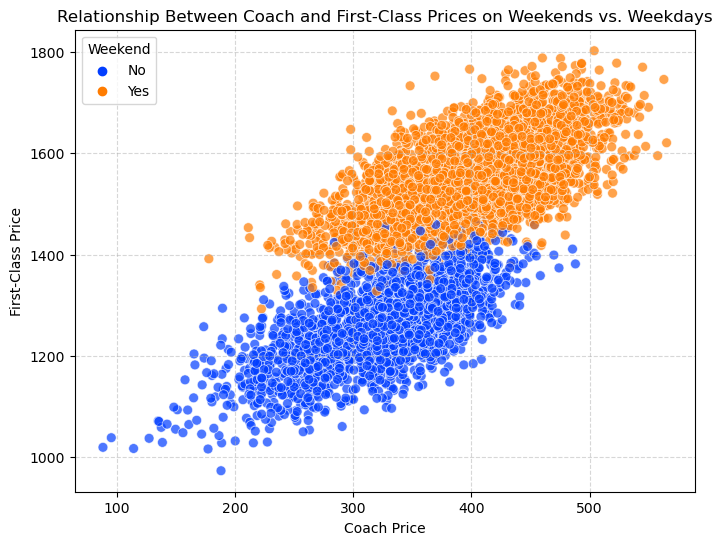

<Figure size 640x480 with 0 Axes>

In [12]:
# Visualize the relationship between coach and first-class prices on weekends compared to weekdays
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coach_price', y='firstclass_price', hue='weekend', data=flight_sub, palette='bright', alpha=0.7, s=50)
plt.title('Relationship Between Coach and First-Class Prices on Weekends vs. Weekdays')
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')
plt.legend(title='Weekend', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)  
plt.show()
plt.clf()

#### Analysis

- **Relationship Between Coach and First-Class Prices**: In both groups, there is a positive correlation between coach and first-class prices, indicating that as coach prices increase, first-class prices tend to increase as well.

- **Price Variability Based on Day of Week**: The prices for both types of flights significantly differ depending on whether the flight occurs on a weekend or weekday. The distinct separation of dots suggests that prices on weekends are generally higher than on weekdays.


### 9. How do coach prices differ for redeyes and non-redeyes on each day of the week?

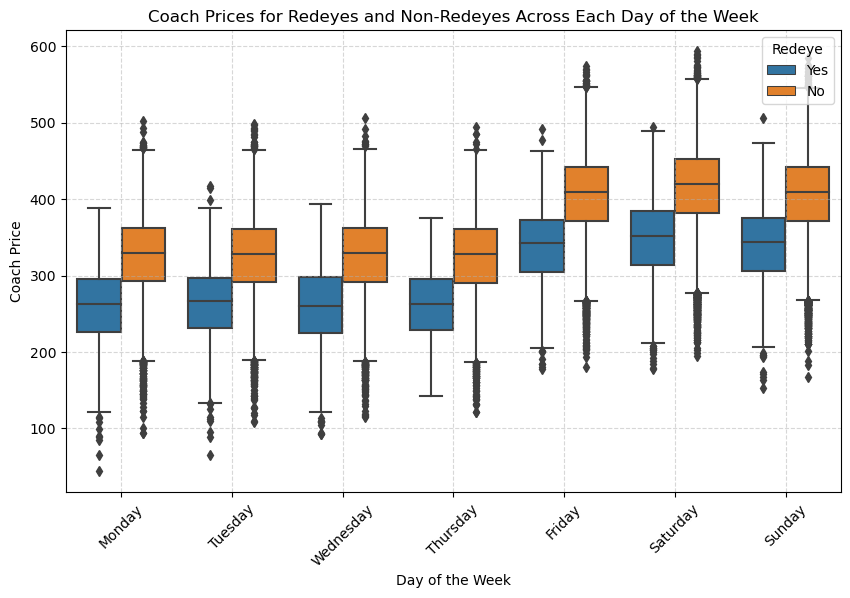

<Figure size 640x480 with 0 Axes>

In [13]:
# Visualize the difference in coach prices between redeyes and non-redeyes on each day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x="day_of_week", y="coach_price", hue="redeye", data=flight, order=week_order)
plt.title('Coach Prices for Redeyes and Non-Redeyes Across Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Coach Price')
plt.legend(title='Redeye', loc='upper right')
plt.xticks(rotation=45)  
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()
plt.clf()

#### Analysis

- **Impact of Flight Timing on Prices**: The boxplot indicates that overnight flights tend to have significantly lower prices regardless of the day of the week. This observation suggests that flight timing, particularly overnight flights, may be a key factor influencing ticket prices. 

- **Variation in Prices Based on Day of Week**: Prices for both groups (with and without redeye) tend to be higher on Friday, Saturday, and Sunday. 


## Conclusion

The analysis of ticket pricing and flight characteristics reveals valuable insights for Air Company Name. We observe several trends that can inform pricing strategies, optimize revenue, and enhance the passenger experience.

- **Pricing Dynamics**: Notably, we find that overnight flights tend to have lower prices, while prices are generally higher on weekends. This insight into pricing dynamics enables us to strategically adjust pricing strategies to maximize revenue and meet passenger demand effectively.

- **Passenger Preferences**: Our analysis highlights the importance of amenities such as inflight entertainment and WiFi, which are associated with higher ticket prices. By offering amenities that align with passenger preferences, we can enhance the overall passenger experience and differentiate ourselves in the market.

- **Operational Considerations**: Longer flights and flights during peak travel times command higher prices, reflecting increased operational costs and passenger demand. By optimizing flight schedules and capacity management, we can improve operational efficiency and profitability.

By aligning our strategies with passenger preferences and market dynamics, we can strengthen our competitive position and deliver exceptional value to our customers.
